01-BU
Flight passanger satisfaction

In [3]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Flight passangers satisfaction').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/13 08:37:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


02-DU

In [4]:
df = spark.read.csv('airline_passenger satisfaction raw.csv',header=True, inferSchema=True, encoding='ISO-8859-1')

2.1 Collect initial data

In [6]:
df.show(truncate=False)
df.show(26)
df.columns

+---+--------------+------+---+-------------+--------------+----------+---------------+---------------+-------------+--------------------------------------+----------------------+----------------+---------------+-------------+----------------+------------+----------------+-----------+--------------+-----------------+----------------------+-----------------------+----------------+-----------------------+
|ID |Aircraft      |Gender|Age|Customer Type|Type of Travel|Cabin Type|Flight Distance|Departure Delay|Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|Check-in Service|Online Boarding|Gate Location|On-board Service|Seat Comfort|Leg Room Service|Cleanliness|Food and Drink|In-flight Service|In-flight Wifi Service|In-flight Entertainment|Baggage Handling|Satisfaction           |
+---+--------------+------+---+-------------+--------------+----------+---------------+---------------+-------------+--------------------------------------+----------------------+-------

+---+--------------+------+---+-------------+--------------+------------+---------------+---------------+-------------+--------------------------------------+----------------------+----------------+---------------+-------------+----------------+------------+----------------+-----------+--------------+-----------------+----------------------+-----------------------+----------------+--------------------+
| ID|      Aircraft|Gender|Age|Customer Type|Type of Travel|  Cabin Type|Flight Distance|Departure Delay|Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|Check-in Service|Online Boarding|Gate Location|On-board Service|Seat Comfort|Leg Room Service|Cleanliness|Food and Drink|In-flight Service|In-flight Wifi Service|In-flight Entertainment|Baggage Handling|        Satisfaction|
+---+--------------+------+---+-------------+--------------+------------+---------------+---------------+-------------+--------------------------------------+----------------------+-------

['ID',
 'Aircraft',
 'Gender',
 'Age',
 'Customer Type',
 'Type of Travel',
 'Cabin Type',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

2.2 Describe the data

In [9]:
df.describe().show()

+-------+-----------------+--------+------+------------------+-------------+--------------+------------+------------------+------------------+------------------+--------------------------------------+----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+----------------------+-----------------------+------------------+--------------------+
|summary|               ID|Aircraft|Gender|               Age|Customer Type|Type of Travel|  Cabin Type|   Flight Distance|   Departure Delay|     Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|  Check-in Service|   Online Boarding|     Gate Location|  On-board Service|     Seat Comfort|  Leg Room Service|       Cleanliness|    Food and Drink| In-flight Service|In-flight Wifi Service|In-flight Entertainment|  Baggage Handling|        Satisfaction|
+-------+-----------------+--------+--

2.3 Explore Data

In [10]:
df.printSchema()

# Display summary statistics
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 1000)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 1000)

df.describe().show()

root
 |-- ID: integer (nullable = true)
 |-- Aircraft: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Wif

+-------+-----------------+--------+------+------------------+-------------+--------------+------------+------------------+------------------+------------------+--------------------------------------+----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+----------------------+-----------------------+------------------+--------------------+
|summary|               ID|Aircraft|Gender|               Age|Customer Type|Type of Travel|  Cabin Type|   Flight Distance|   Departure Delay|     Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|  Check-in Service|   Online Boarding|     Gate Location|  On-board Service|     Seat Comfort|  Leg Room Service|       Cleanliness|    Food and Drink| In-flight Service|In-flight Wifi Service|In-flight Entertainment|  Baggage Handling|        Satisfaction|
+-------+-----------------+--------+--

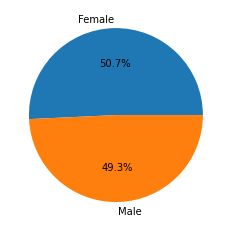

In [11]:
import matplotlib.pyplot as plt
gender_counts = df.groupBy("Gender").count().collect()
genders = [row["Gender"] for row in gender_counts]
counts = [row["count"] for row in gender_counts]
plt.pie(counts, labels=genders, autopct='%1.1f%%')
plt.show()

+-------------+------+
|Customer Type| count|
+-------------+------+
|   First-time| 23780|
|    Returning|106100|
+-------------+------+



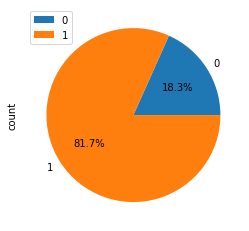

In [12]:
customer_type_counts = df.groupBy('Customer Type').count()
customer_type_counts.show()
customer_type_counts.toPandas().plot.pie(y='count', autopct='%1.1f%%')
plt.show()

+--------------+-----+
|Type of Travel|count|
+--------------+-----+
|      Personal|40187|
|      Business|89693|
+--------------+-----+



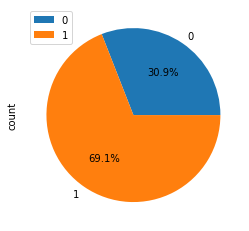

In [13]:
travel_type_counts = df.groupBy('Type of Travel').count()
travel_type_counts.show()
travel_type_counts.toPandas().plot.pie(y='count', autopct='%1.1f%%')
plt.show()

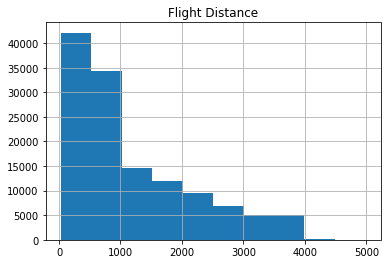

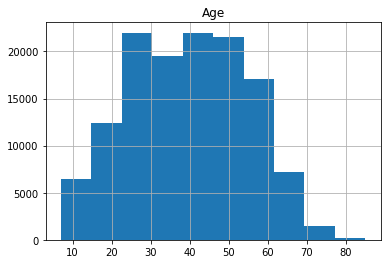

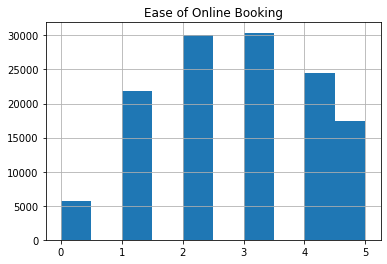

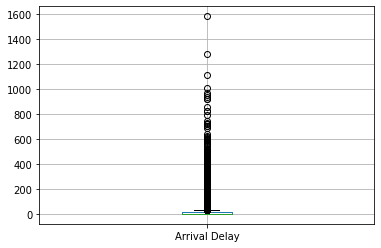

In [14]:
df.select('Flight Distance').toPandas().hist()
plt.show()


df.select('Age').toPandas().hist()
plt.show()


df.select('Ease of Online Booking').toPandas().hist()
plt.show()


df.select('Arrival Delay').toPandas().boxplot()
plt.show()

03 DP

3.1 Select the data

In [15]:
from pyspark.sql.functions import col
#delete some attributes

df_03 = df.drop('Aircraft', 'Type of Travel', 'In-flight Wifi Service')

df_03.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

3.2 Clean the data

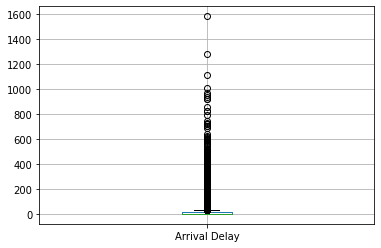

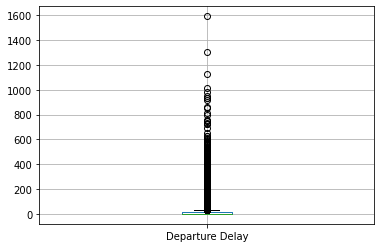

In [16]:
import matplotlib.pyplot as plt

arrival_delay_data = df_03.select('Arrival Delay').toPandas()
arrival_delay_data.boxplot()
plt.show()

departure_delay_data = df_03.select('Departure Delay').toPandas()
departure_delay_data.boxplot()
plt.show()


In [22]:
filtered_df = df_03.filter((col('Arrival Delay') < 1000) & (col('Departure Delay') < 1000))
filtered_df.printSchema()
row_count = filtered_df.count()
print("filted rows {} ".format(row_count))

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

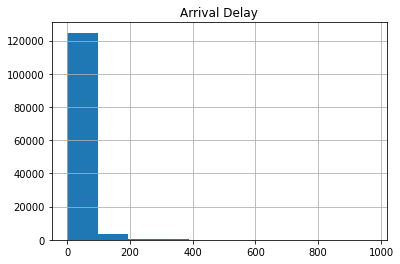

In [23]:
arrival_delay_data = filtered_df.select('Arrival Delay').toPandas()
arrival_delay_data.hist()
plt.title('Arrival Delay')
plt.show()

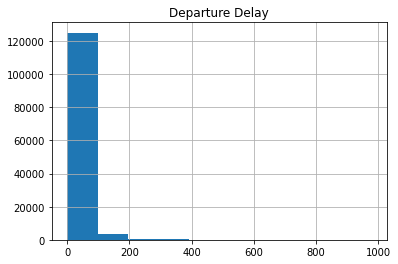

In [24]:
departure_delay_data = filtered_df.select('Departure Delay').toPandas()
departure_delay_data.hist()
plt.title('Departure Delay')
plt.show()

In [25]:
max_values = filtered_df.select(
    col('Arrival Delay').alias('Max Arrival Delay'),
    col('Departure Delay').alias('Max Departure Delay')
).agg(
    {"Max Arrival Delay": "max", "Max Departure Delay": "max"}
).collect()
max_arrival_delay = max_values[0]["max(Max Arrival Delay)"]
max_departure_delay = max_values[0]["max(Max Departure Delay)"]
print("Max of Arrival Delay:", max_arrival_delay)
print("Max of Departure Delay:", max_departure_delay)

Max of Arrival Delay: 970
Max of Departure Delay: 978


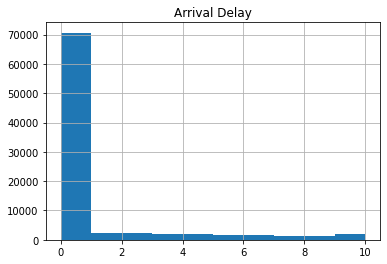

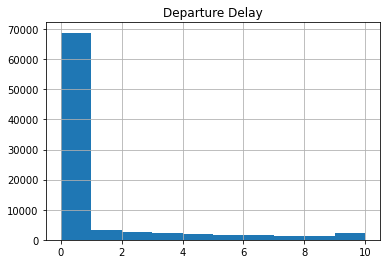

In [26]:
#drop Arrival Delay > 10 or Departure Delay >10 rows
filtered_df1 = filtered_df.filter((col('Arrival Delay') <= 10) & (col('Departure Delay') <= 10))

arrival_delay_data_1 = filtered_df1.select('Arrival Delay').toPandas()
arrival_delay_data_1.hist()
plt.title('Arrival Delay')
plt.show()

departure_delay_data_1 = filtered_df1.select('Departure Delay').toPandas()
departure_delay_data_1.hist()
plt.title('Departure Delay')
plt.show()